# Data Science Challenge for Perengo#

In [285]:
# Imports and load data
import pandas as pd
import numpy as np
from random import random
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

data = pd.read_csv("../data/DS_challenge_data_updated.csv")

In [286]:
#data = data.replace(0, np.nan).dropna(axis=0, how='any').reset_index(drop=True)
data["cpa"] = data.cost/data.conversions
data["conversion_rate"] = data.conversions/data.clicks
data = data[data.conversion_rate <=1].reset_index(drop=True)

## Base Assumptions ##

- Dates: Hold no predictive power in terms of conversions
- The data is assumed to be representative of the conversion environment behaviours. This is to say that the insights extracted from this subset of the data will generalize to the larger dataset.
- Instances where the conversions are higher than clicks are treated as data error and filtered. In the real world this may not be the case, as the applications may have been driven from exterior forces outside the campaign.



In [216]:
data.head(10)

,date,clicks,conversions,cost,industry,customer,publisher,target_cpa,cpa,conversion_rate,conversion_cost
0,2019-10-21,3780,45,4526.27,W,1,C,40,100.583778,0.011905,100.583778
1,2019-10-21,1136,35,572.33,V,4,C,35,16.352286,0.030810,16.352286
2,2019-10-17,1937,33,1870.41,T,6,B,25,56.679091,0.017037,56.679091
3,2019-10-17,80,17,88.39,V,4,A,35,5.199412,0.212500,5.199412
4,2019-10-17,638,13,691.36,Y,3,C,25,53.181538,0.020376,53.181538
5,2019-10-17,400,2,129.08,U,5,C,25,64.540000,0.005000,64.540000
6,2019-10-19,211,4,139.37,W,1,E,40,34.842500,0.018957,34.842500
7,2019-10-17,11,0,11.19,T,7,B,15,inf,0.000000,inf
8,2019-10-19,165,1,71.77,U,5,C,25,71.770000,0.006061,71.770000
9,2019-10-22,1280,9,797.44,U,5,C,25,88.604444,0.007031,88.604444


## Part I-1 ##

# 1 #

The main features that have an impact on the response variables such as total conversion or CPA are "industry" and "publisher". If we are looking at the data, we can see that When grouped by industry and publisher, there is a clear indication of separation in terms of total number of conversions.

In [223]:
data.groupby(["industry", "customer", "publisher"]).conversions.sum()

industry   customer    publisher
Marketing  new_client  A             312
T          6           A            4216
                       B             144
                       C             689
                       D               4
                       E            1038
           7           A             223
                       B              36
                       C             141
                       E             123
U          2           A             168
                       B             399
                       C            1487
                       D               0
                       E               6
           5           A             207
                       B               3
                       C             125
                       D               0
                       E               1
V          4           A            1120
                       B             141
                       C            1324
                       D

Some things we want to note here is that the data is not evenly distributed across the classes. We can see from the table below that ther number of cambaigns for each industry/publisher combination varies. This suggests that the number for the total conversions is will likely be higher in combination with more campaign runs.

In [340]:
data.groupby(["industry", "customer", "publisher"]).conversions.count()

industry   customer    publisher
Marketing  new_client  A            25
T          6           A            35
                       B            39
                       C            48
                       D             3
                       E            42
           7           A            24
                       B            16
                       C            28
                       E            23
U          2           A             2
                       B            69
                       C            70
                       E             5
           5           A            34
                       B             3
                       C            36
                       E             1
V          4           A            73
                       B            50
                       C            90
                       E            17
                       F            12
                       H             3
W          1           B       

In [226]:
data.groupby(["industry", "customer", "publisher"]).conversion_rate.mean()

industry   customer    publisher
Marketing  new_client  A            0.117563
T          6           A            0.376000
                       B            0.076302
                       C            0.118007
                       D            0.002590
                       E            0.336834
           7           A            0.199903
                       B            0.029782
                       C            0.084753
                       E            0.143416
U          2           A            0.104912
                       B            0.038312
                       C            0.087752
                       D            0.000000
                       E            0.067560
           5           A            0.074700
                       B            0.000667
                       C            0.096335
                       D            0.000000
                       E            0.000827
V          4           A            0.150336
                      

To counter this, we used the average conversion rate instead.

In [291]:
data.groupby(["industry", "customer", "publisher"]).cost.sum()/data.groupby(["industry", "customer", "publisher"]).conversions.sum()


industry   customer    publisher
Marketing  new_client  A              7.925769
T          6           A              3.400128
                       B             43.069931
                       C             18.319898
                       D            194.280000
                       E             14.088025
           7           A              9.361749
                       B            137.714722
                       C             47.879645
                       E             31.419675
U          2           A              2.098393
                       B             23.830476
                       C             17.288958
                       D                   inf
                       E             27.068333
           5           A             41.506715
                       B            442.796667
                       C             70.824560
                       D                   inf
                       E            399.010000
V          4           A   

In [278]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

for index, industry in enumerate(data.industry.unique()):
    data.loc[data.industry == industry, ["industry"]] = index

for index, publisher in enumerate(data.publisher.unique()):
    data.loc[data.publisher == publisher, ["publisher"]] = index

data.loc[data.customer == "new_client", ["customer"]] = '8'
data["customer"].astype(int)

data["difference"] = data.target_cpa-data.cpa
data["class"] = data["difference"] > 0 - data.target_cpa* 0.1
test = data["difference"] > 0

X_train, X_test, y_train, y_test = train_test_split(data[['industry', 'customer', 'publisher']],
                                                    data[['class']],
                                                    test_size=0.2, random_state=999)

model = DecisionTreeClassifier(random_state=999)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

importances = model.feature_importances_
accuracy = accuracy_score(y_test, y_pred)

print("The explained variance from {} is {}%".format('industry', round(importances[0]*100, 2)))
print("The explained variance from {} is {}%".format('customer', round(importances[1]*100, 2)))
print("The explained variance from {} is {}%".format('publisher', round(importances[2]*100, 2)))
print("The accuracy is {}%".format(round(accuracy*100, 2)))

scores = cross_val_score(model, data[['industry', 'customer', 'publisher']],  data[['class']], cv=10)
print("Cross Validation Accuracy: {}% (+/- {})".format(round(scores.mean()*100,2), round(scores.std() * 200,2)))

The explained variance from industry is 13.91%
The explained variance from customer is 36.09%
The explained variance from publisher is 50.0%
The accuracy is 76.4%
Cross Validation Accuracy: 71.96% (+/- 7.95)


In [338]:
def sample_data(data, industry, customer, publisher):
    samples = pd.DataFrame([])
    filtered = data[data.industry == industry]
    filtered = filtered[filtered.customer == customer]
    filtered = filtered[filtered.publisher == publisher]
    if len(filtered) > 0:
        samples = filtered.sample(n=1000, random_state=1, replace=True)
    else:
        samples.columns = filtered.columns
    return samples


data = pd.read_csv("../data/DS_challenge_data_updated.csv")
data = data.replace(0, np.nan).dropna(axis=0, how='any').reset_index(drop=True)
data["cpa"] = data.cost/data.conversions
data["conversion_rate"] = data.conversions/data.clicks
data = data[data.conversion_rate <=1].reset_index(drop=True)

grouped = data.groupby(["industry", "customer", "publisher"])[["target_cpa"]].min()
simulation_data = pd.DataFrame(columns = data.columns)

simulation_data = pd.DataFrame()
for industry, customer, publisher in grouped.index:
    sampled = sample_data(data, industry, customer, publisher)
    simulation_data = simulation_data.append(sampled.groupby(["industry", "customer", "publisher"])["clicks", "conversions", "cost"].sum().reset_index(), ignore_index = True)


grouped = simulation_data.groupby(["industry", "customer", "publisher"])["clicks", "conversions", "cost"].max()

grouped["conversion_cost"] = grouped.cost/grouped.conversions

grouped

clicks  conversions        cost  \
industry  customer   publisher                                     
Marketing new_client A           129348      12880.0   102235.01   
T         6          A           393739     110922.0   373834.96   
                     B           157943       3814.0   153665.21   
                     C           258955      13831.0   244715.51   
                     D           141973       1329.0   159347.11   
                     E           374001      25936.0   366200.77   
          7          A            86550       9137.0    82188.35   
                     B           178513       2331.0   215274.08   
                     C           246079       5033.0   237870.62   
                     E           141135       5332.0   163918.35   
U         2          A           243982      87564.0   180883.74   
                     B           162916       5764.0   132971.77   
                     C           513725      22173.0   385946.85   
                     E             8665       1196.0     7921.97   
          5          A           201457       5855.0   234958.25   
                     B           170398       1000.0   155665.82   
                     C           350862       3562.0   245421.08   
                     E            93000       1000.0    81070.00   
V         4          A           208517      16244.0   204478.93   
                     B           128849       2885.0   108563.51   
                     C           673106      14911.0   432366.12   
                     E            54229       1175.0    64697.10   
                     F           458345       3631.0   383299.04   
                     H           729351       2336.0   658498.85   
W         1          B          1076110      18211.0   905485.00   
                     C          3861316      93916.0  3139635.38   
                     D          1135327      16761.0   763073.13   
                     E          1370425      36073.0  1367054.71   
                     H           207332       2336.0   240730.74   
Y         3          A           269593      19232.0   319041.29   
                     B           247254       2345.0   253275.80   
                     C           271022       5471.0   233632.57   
                     E            87026       2763.0    97248.39   
                     H            19000       1000.0    18430.00   

                                conversion_cost  
industry  customer   publisher                   
Marketing new_client A                 7.937501  
T         6          A                 3.370251  
                     B                40.289777  
                     C                17.693262  
                     D               119.900008  
                     E                14.119400  
          7          A                 8.995113  
                     B                92.352673  
                     C                47.262194  
                     E                30.742376  
U         2          A                 2.065732  
                     B                23.069356  
                     C                17.406163  
                     E                 6.623721  
          5          A                40.129505  
                     B               155.665820  
                     C                68.899798  
                     E                81.070000  
V         4          A                12.587967  
                     B                37.630333  
                     C                28.996454  
                     E                55.061362  
                     F               105.562941  
                     H               281.891631  
W         1          B                49.721871  
                     C                33.430250  
                     D                45.526707  
                     E                37.896895  
                     H               103.052543  
Y         3          A            

In [336]:
grouped = simulation_data.groupby(["industry", "customer"])[["clicks", "conversions", "cost"]].max()

grouped["conversion_cost"] = grouped.cost/grouped.conversions

grouped = grouped.reset_index()

grouped = pd.merge(left=grouped,right=simulation_data[["clicks", "publisher"]], left_on='clicks', right_on='clicks')
grouped

,industry,customer,clicks,conversions,cost,conversion_cost,publisher
0,Marketing,new_client,129348,12880.0,102235.01,7.937501,A
1,T,6,393739,110922.0,373834.96,3.370251,A
2,T,7,246079,9137.0,237870.62,26.033777,C
3,U,2,513725,87564.0,385946.85,4.407597,C
4,U,5,350862,5855.0,245421.08,41.916495,C
5,V,4,729351,16244.0,658498.85,40.537974,H
6,W,1,3861316,93916.0,3139635.38,33.430250,C
7,Y,3,271022,19232.0,319041.29,16.589085,C


# 3 #

If we look a the distribution of the campaigns in the data we have the highest average conversion rates at using the following settings:

- Industry T at publisher A
- Industry U at publisher C for customer 2
- Industry U at publisher A for customer 5
- Industry V at publisher A
- Industry W at publisher C
- Industry Y at publisher A

and we have the most campaigns run at the following publishers:

- Industry T at publisher B
- Industry U at publisher C
- Industry V at publisher C
- Industry W at publisher C
- Industry Y at publisher A

To maximise conversions we could start running new campaigns at the corresponding publishers with higher conversion rates.

## Part I - 2 ##

If we want to start running new campaigns for the new customer, we need to find an existing customer which has the same behaviour. In this dataset, we don't have customer information, which means that we need to use something else as a proxy for response behaviour. 

In this case, I have decided to look at the distribution of "clicks" vs "conversions". The rationale is that a previous customer with the same click/conversions behaviour as the new customer for publisher A would have similar behaviours for the other publishers. 

In the plots below we can see that while there is overlap of the new customer with many other customers, there is a clear overlap of the behaviours with client 7.

If we look at the behaviour of the campaigns run so far for customer 7, we can see that publisher A has the highest conversion rate and the lowest cost. If we wanted to run new campaigns for the new customer with the assumption that the behaviours would mirror customer 7, we should use publisher A.

Other potential candidates are to mirror the behaviours for customers 3 and 4.


In [196]:
def plot_columns(x, y, groups, title):
    fig, ax = plt.subplots()
    for name, group in groups:
        ax.plot(group[x], group[y], marker='.', linestyle='', label=name)
    plt.xlabel(x)
    plt.ylabel(y) 
    plt.title(title) 
    ax.legend()

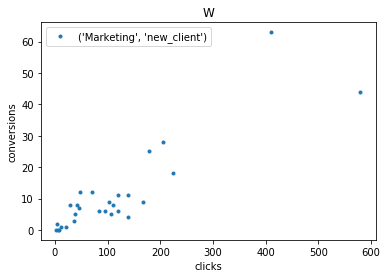

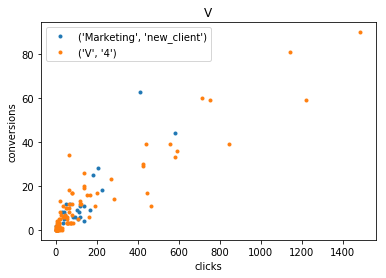

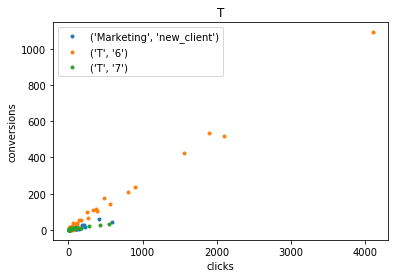

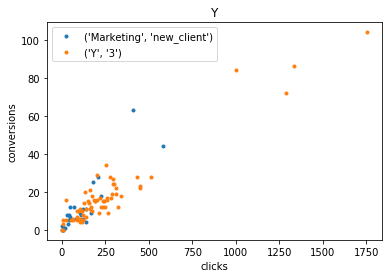

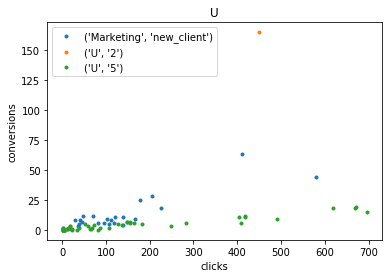

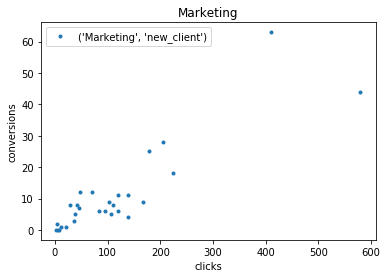

In [235]:
for industry in data.industry.unique():
    filtered = data[data.industry.isin([industry, "Marketing"])]
    filtered = filtered[filtered.publisher == 'A']
    groups = filtered.groupby(["industry", "customer"])
    plot_columns('clicks', 'conversions', groups, industry)


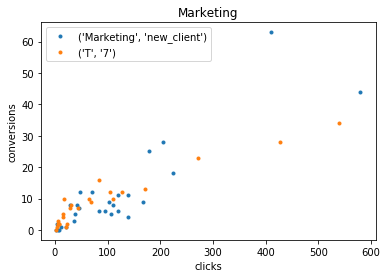

In [234]:
    filtered = data[data.industry.isin(['T', "Marketing"])]
    filtered = filtered[filtered.publisher == 'A']
    filtered = filtered[filtered.customer.isin(['7', 'new_client'])]
    groups = filtered.groupby(["industry", "customer"])
    plot_columns('clicks', 'conversions', groups, industry)
